# Fake news Detection

### Importing required library

In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

### Inserting fake and real dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [4]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [5]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

# BASIC DATA EXPLORATION

subject
politicsNews    11272
worldnews       10145
Name: text, dtype: int64


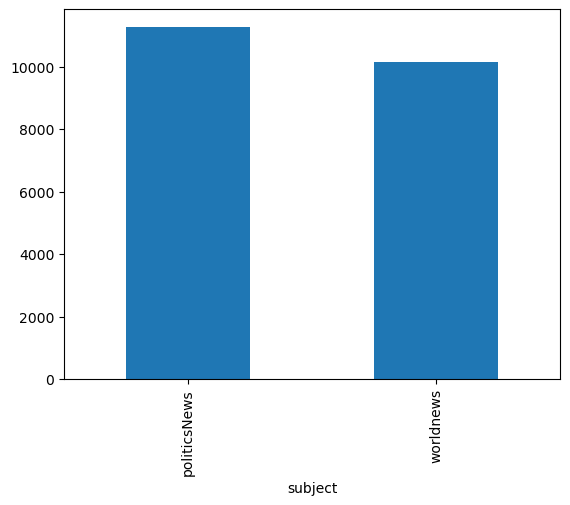

In [6]:
# How many articles per subject?
import matplotlib.pyplot as plt
print(df_true.groupby(['subject'])['text'].count())
df_true.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

subject
Government News    1570
Middle-east         778
News               9050
US_News             783
left-news          4459
politics           6841
Name: text, dtype: int64


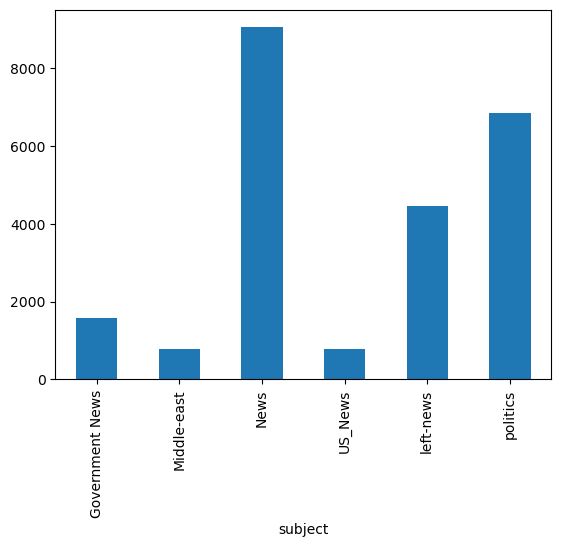

In [7]:
# How many articles per subject?
import matplotlib.pyplot as plt
print(df_fake.groupby(['subject'])['text'].count())
df_fake.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

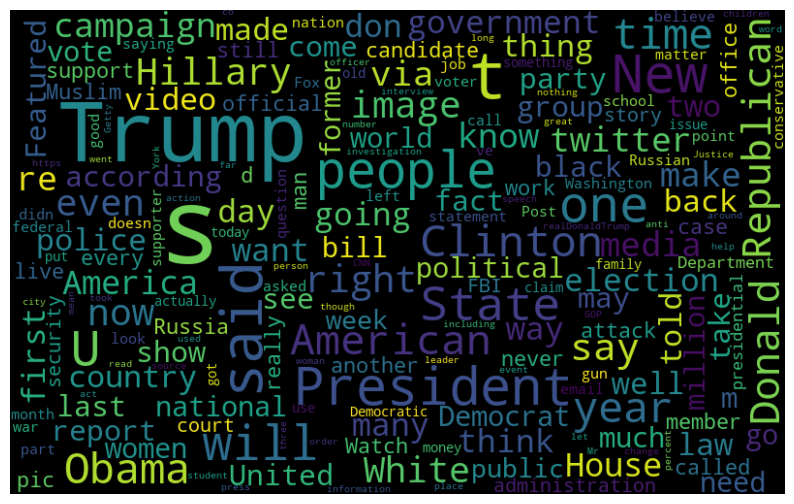

In [8]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = df_fake[df_fake["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

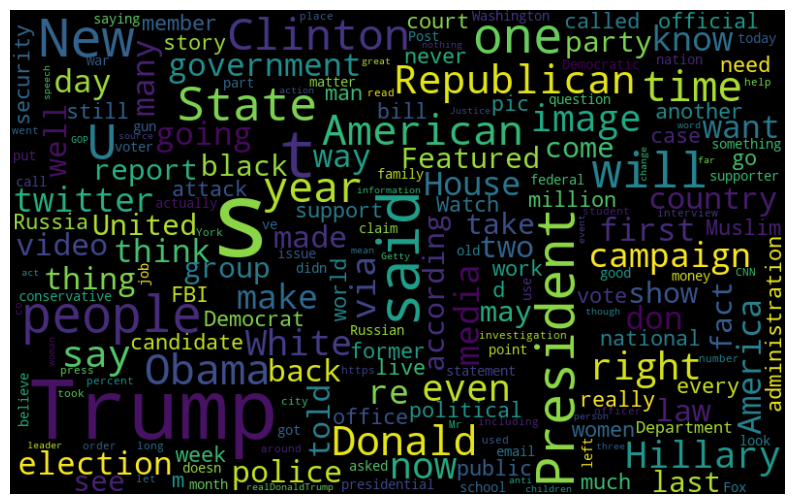

In [9]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = df_true[df_true["class"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
import nltk
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

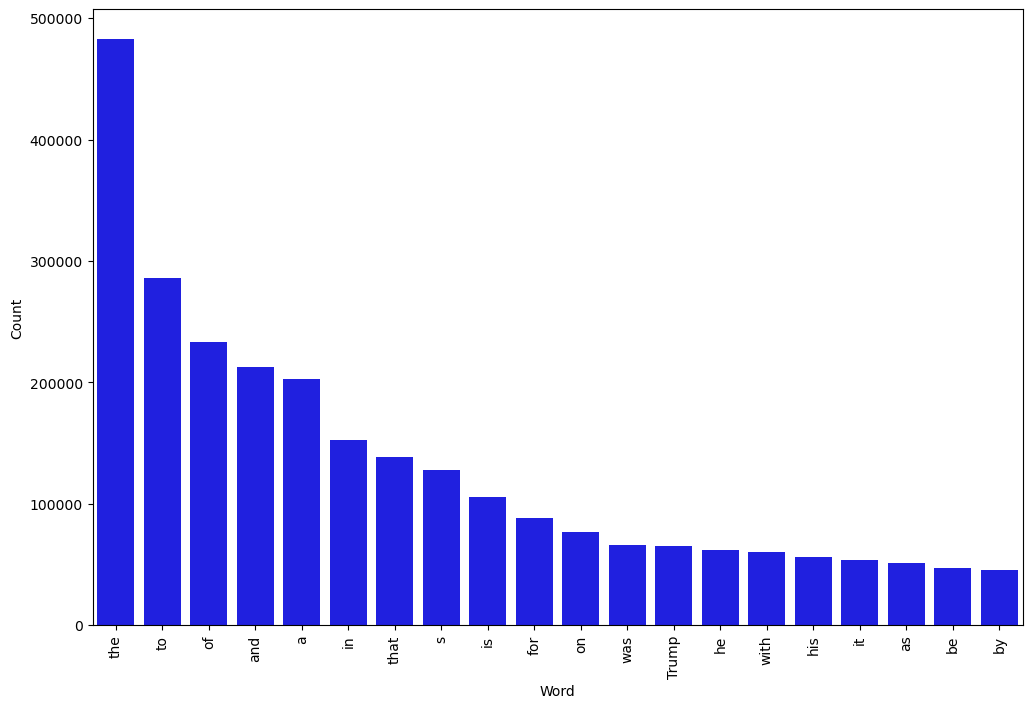

In [11]:
# Most frequent words in fake news
import seaborn as sns 

counter(df_fake[df_fake["class"] == 0], "text", 20)

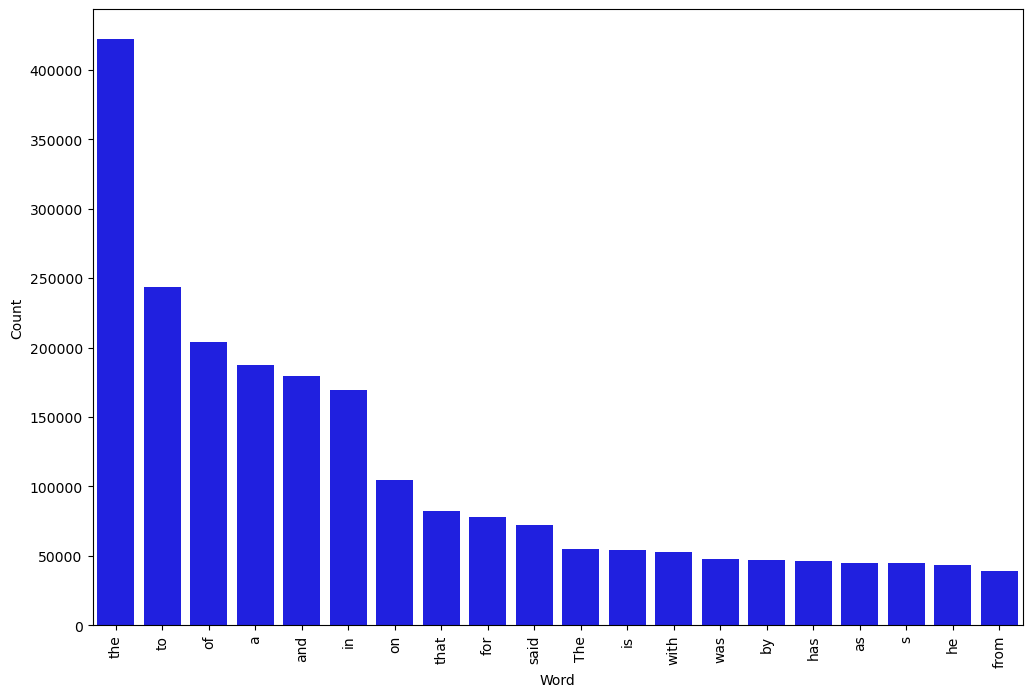

In [12]:
counter(df_true[df_true["class"] == 1], "text", 20)

In [13]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

Merging the manual testing dataframe in single dataset and save it in a csv file

In [14]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
#chown ja:admin afc_east.csv
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [15]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df=df_marge.head(10)

In [16]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [17]:
#"title",  "subject" and "date" columns is not required for detecting the fake news, so drop the columns.

In [18]:
df = df_marge.drop(["title", "subject","date"], axis = 1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


#### Randomly shuffling the dataframe 

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head(10)

,text,class
17094,"CARACAS/PUERTO ORDAZ, Venezuela (Reuters) - Ve...",1
11236,WASHINGTON (Reuters) - Republican presidential...,1
251,WASHINGTON (Reuters) - Millions of households ...,1
6224,Some of Donald Trump s biggest fans and suppor...,0
15045,Hillary Clinton is a serial liar. Hillary Cli...,0
19103,LONDON (Reuters) - Irish Prime Minister Leo Va...,1
13992,ANKARA (Reuters) - Turkish authorities issued ...,1
1076,"It s hard not to feel that John McCain, after ...",0
19567,MOSCOW (Reuters) - At least eight North Korean...,1
8934,"On Tuesday s edition of The Nightly Show, Dem...",0


In [21]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [22]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [23]:
df.columns

Index(['text', 'class'], dtype='object')

In [24]:
df.head()

,text,class
0,"CARACAS/PUERTO ORDAZ, Venezuela (Reuters) - Ve...",1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,WASHINGTON (Reuters) - Millions of households ...,1
3,Some of Donald Trump s biggest fans and suppor...,0
4,Hillary Clinton is a serial liar. Hillary Cli...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [25]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [26]:
df["text"] = df["text"].apply(wordopt)
df.head(10)

,text,class
0,caracas puerto ordaz venezuela reuters ve...,1
1,washington reuters republican presidential...,1
2,washington reuters millions of households ...,1
3,some of donald trump s biggest fans and suppor...,0
4,hillary clinton is a serial liar hillary cli...,0
5,london reuters irish prime minister leo va...,1
6,ankara reuters turkish authorities issued ...,1
7,it s hard not to feel that john mccain after ...,0
8,moscow reuters at least eight north korean...,1
9,on tuesday s edition of the nightly show dem...,0


#### Defining dependent and independent variable as x and y

In [27]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [33]:
LR.score(xv_test, y_test)

0.9877896613190731

In [34]:
pred_lr=LR.predict(xv_test)

In [35]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [36]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


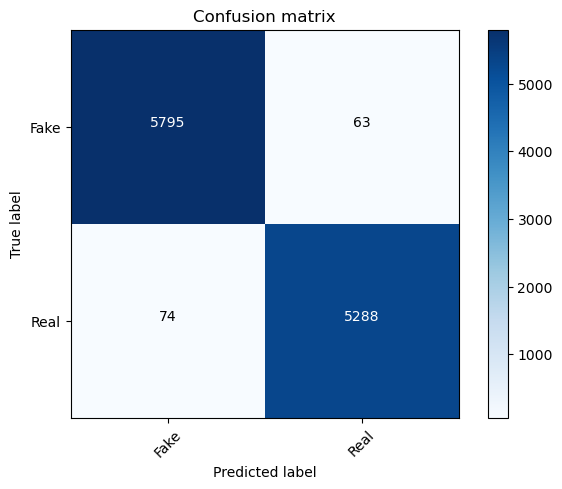

In [37]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# DECISION TREE CLASSIFIER

In [38]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [39]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9954545454545455

In [40]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5858
           1       1.00      0.99      1.00      5362

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Confusion matrix, without normalization


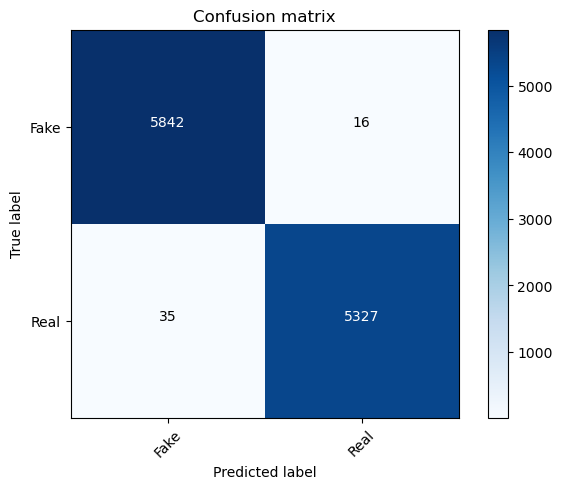

In [41]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# GRADIENT BOOSTING CLASSIFIERS

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [43]:
pred_gb = GB.predict(xv_test)
GB.score(xv_test, y_test)

0.9954545454545455

In [44]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5858
           1       0.99      1.00      1.00      5362

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Confusion matrix, without normalization


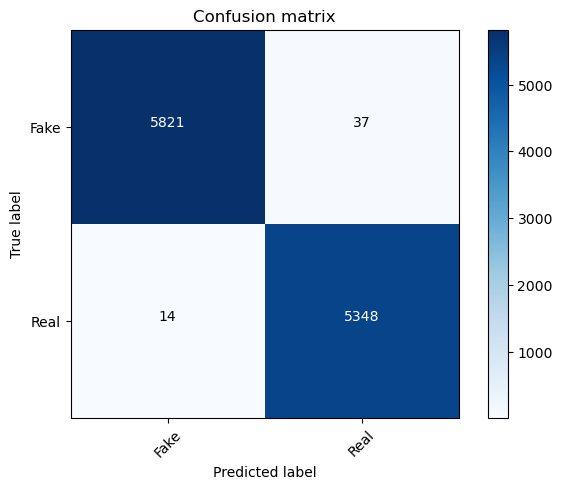

In [45]:
cm = metrics.confusion_matrix(y_test, pred_gb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# RANDOM FOREST CLASSIFIER

In [46]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
pred_rf = RF.predict(xv_test)
RF.score(xv_test, y_test)

0.9905525846702318

In [48]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion matrix, without normalization


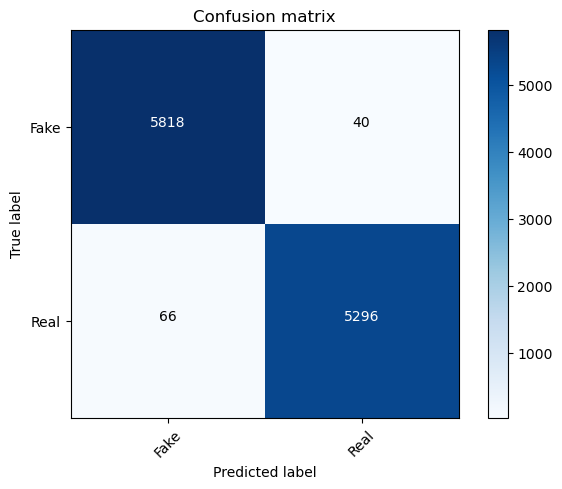

In [49]:
cm = metrics.confusion_matrix(y_test, pred_rf)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [ ]:
from sklearn import svm

#Create a svm Classifier
SVM = svm.SVC(kernel='linear') # Linear Kernel
SVM.fit(xv_train, y_train)

In [ ]:
pred_svm = SVM.predict(xv_test)
SVM.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_svm))

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_svm)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# NAIVE BAYES

In [54]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [55]:
pred_nb=NB.predict(xv_test)
NB.score(xv_test, y_test)

0.9402852049910874

In [56]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5889
           1       0.94      0.93      0.94      5331

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



Confusion matrix, without normalization


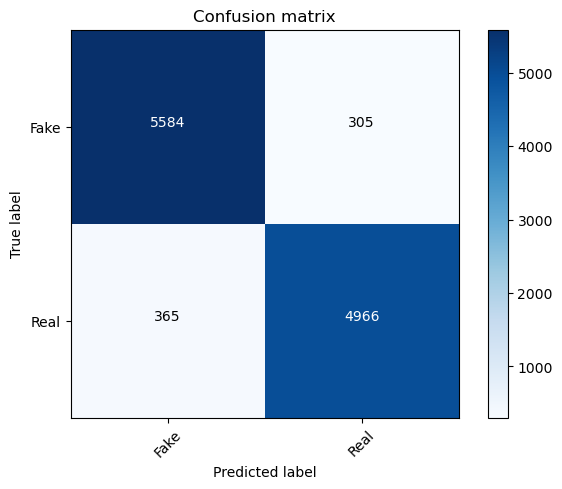

In [57]:
cm = metrics.confusion_matrix(y_test, pred_nb)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [59]:
from sklearn.metrics import accuracy_score

dct = dict()
dct['LogisticRegression'] = round(accuracy_score(y_test, pred_lr)*100,2)
dct['DecisionTreeClassifier'] = round(accuracy_score(y_test, pred_dt)*100,2)
dct[' GradientBoosting'] = round(accuracy_score(y_test, pred_gb)*100,2)
dct['RandomForest'] = round(accuracy_score(y_test, pred_rf)*100,2)
dct[' SVM'] = round(accuracy_score(y_test, pred_svm)*100,2)
dct['Naive Bayes'] = round(accuracy_score(y_test, pred_nb)*100,2)

([<matplotlib.axis.YTick at 0x2831df95cf0>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

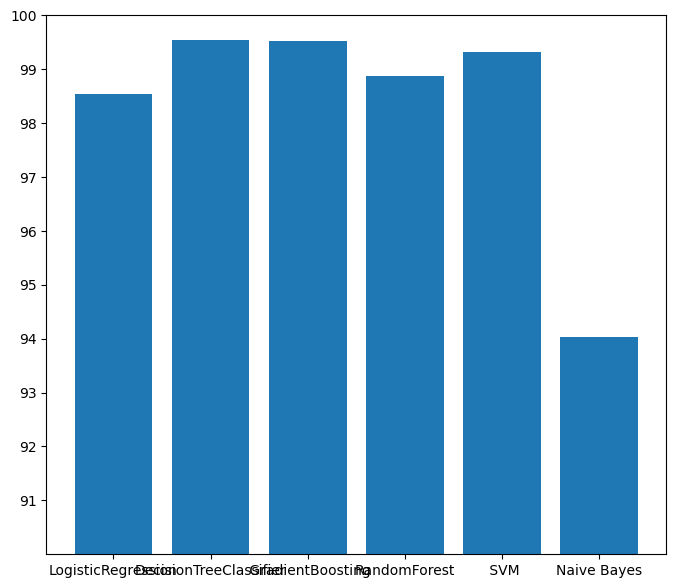

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [61]:
import pickle
filename = 'finalised_model.pkl'
pickle.dump(LR,open(filename,'wb'))

In [62]:
filename = 'vectorizer.pkl'
pickle.dump(vectorization,open(filename,'wb'))

# Model Testing With Manual Entry

### News

In [63]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "True News"
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]),output_lable(pred_GB[0]),output_lable(pred_RF[0])))

    #return print("\n\nLR Prediction: {}".format(output_lable(pred_LR[0])))

In [64]:
news = str(input())
manual_testing(news)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even all

In [66]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that s

# FOR OUTPUT

#FAKE NEWS


Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.

#REAL NEWS

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. 